In [56]:
import theano
import numpy as np
np.random.seed(123) #reproductibilité

#sequential est un type de reseau de neuronnes lineaire
from keras.models import Sequential 

#importer les fonctions d'activation a utilsier entre les differentes couches du reseau
from keras.layers import Dense, Dropout, Activation, Flatten

#couches de convoluton
from keras.layers import Convolution2D, MaxPooling2D

from keras.utils import np_utils

In [57]:
#telechargement et datasplit de la librairie mnist (chiffres et lettres ecrits a la main)
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [58]:
print("la taille de l'entrainement est", X_train.shape)
#on obtient 60000 images de taille 28x28 pixels

la taille de l'entrainement est (60000, 28, 28)


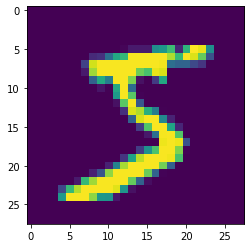

In [59]:
### pour visualiser une des images et verifier ce a quoi on a affaire
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

In [60]:
#PREPROCESSING

In [61]:
#Reshape data pour ajouter une dimension profondeur qui correspond au codage en couleur. Ici cette profondeur vaut 1 
#mais elle vaudrait 3 si nous prenions un codage RGB. Les autres dimensions sont longueur, largeur, hauteur.

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28,28)

print(X_train.shape)

(60000, 1, 28, 28)


In [62]:
#normalisation des donnes sur [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


#valeur max de l'info = 255 pour un codage 8 bits
X_train = X_train / 255
X_test = X_test / 255


print(y_train.shape)

(60000,)


In [63]:
#One-hot encoding sur les target y : on regarde le nombre de classe (nombre de valeurs uniques) contenues dans y et
#on transforme les donnes en valeurs de 0 a 1 en fonction de l'appartenance a la classe
#confere methode one-hot encoding pour plus de comprehenssion

#ici il y a 10 classes (chiffres de 0 a 9)

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [64]:
print(Y_train.shape)

(60000, 10)


In [65]:
#BUILDING THE MODEL

In [66]:
model = Sequential()

In [67]:
#Creation de la premiere couche
#input shape = taille des donnees en entree (taille de chaque image)
#les valeurs 32,3,3 correspondent respectivement aux nombre de filtres de convolution, le nombre de ligne et de colonnes
#pour chaque noyau

model.add(Convolution2D(32, (1, 1), activation='relu', input_shape=(1,28,28)))

In [68]:
print(model.output_shape)

(None, 1, 28, 32)


In [69]:
#ajout de 2 couche au reseau

In [70]:
#activation : fonction d'activation d'une couche a l'autre
#dropout : extinction de certains neurones de la couche pour empecher l'overfitting (apprentissage par coeur) 
model.add(Convolution2D(32, 1, 1, activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
model.add(Dropout(0.25))

c:\users\tkt\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
#Nouvelles couches
#A flatten operation on a tensor reshapes the tensor to have the shape that is equal to the number of 
#elements contained in tensor non including the batch dimension (convertit une matrice en array)

#dense : regular connected layer

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

#output (derniere couche)
model.add(Dense(10, activation='softmax'))

In [72]:
#definition d'une fonction de coûts : mesure l'erreur entre la valeur predite par le modele et la vrai valeur
#a chaque etape de l'entrainement et d'un optimizer : quelle valeur souhaite-t-on optimiser ?

#ici : -loss function : categorical crossentropy
#      -Optimizer :adam (gradient descent avec optimisation intelligente du learning rate au cours de l'entrainement)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [73]:
#ENTRAINEMENT

In [75]:
### on entraine par echantillion de 32 images
#verbose = 1 : visualisation de l'evolution des entrainements (a ajuster en fonction des valeurs)
model.fit(X_train, Y_train,batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
  768/60000 [..............................] - ETA: 13s - loss: 0.0703 - accuracy: 0.9753

c:\users\tkt\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


60000/60000 [==============================] - 15s 244us/step - loss: 0.0945 - accuracy: 0.9703
Epoch 2/10
60000/60000 [==============================] - 15s 251us/step - loss: 0.0924 - accuracy: 0.9714
Epoch 3/10
60000/60000 [==============================] - 15s 253us/step - loss: 0.0898 - accuracy: 0.9720
Epoch 4/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.0870 - accuracy: 0.9727
Epoch 5/10
60000/60000 [==============================] - 15s 250us/step - loss: 0.0850 - accuracy: 0.9728
Epoch 6/10
60000/60000 [==============================] - 15s 252us/step - loss: 0.0804 - accuracy: 0.9748
Epoch 7/10
60000/60000 [==============================] - 15s 246us/step - loss: 0.0818 - accuracy: 0.9735
Epoch 8/10
60000/60000 [==============================] - 15s 244us/step - loss: 0.0780 - accuracy: 0.9754
Epoch 9/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0772 - accuracy: 0.9757
Epoch 10/10
60000/60000 [=======================

In [76]:
#EVALUATION DU MODEL SUR LES DONNEES TEST JAMAIS VUES AU COURS DE LENTRAINEMENT

In [79]:
score = model.evaluate(X_test, Y_test, verbose = 1)

10000/10000 [==============================] - 1s 66us/step


In [80]:
print(score)

[0.06267585167483193, 0.9814000129699707]


AttributeError: 'list' object has no attribute 'size'